# Clustering Project

## 1. Data Prep

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("seaborn-v0_8")
%config InlineBackend.figure_format = 'svg'

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving wholesale_clients.csv to wholesale_clients.csv


In [ ]:
# a. Read in the data file wholesale_clients.csv

In [ ]:
df = pd.read_csv('wholesale_clients.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


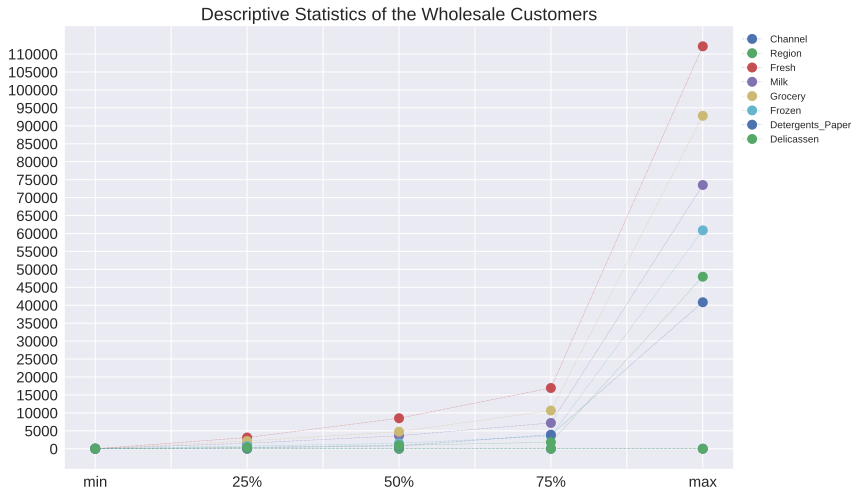

In [ ]:
df.describe().iloc[-5:,:].plot(marker = 'o',
                   figsize = (12,8),
                   ms = 10,
                   ls = ":",
                   lw = 0.5)
plt.title("Descriptive Statistics of the Wholesale Customers", fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(range(0,112000,5000), fontsize = 15, )
plt.legend(bbox_to_anchor = (1,1))
plt.show()

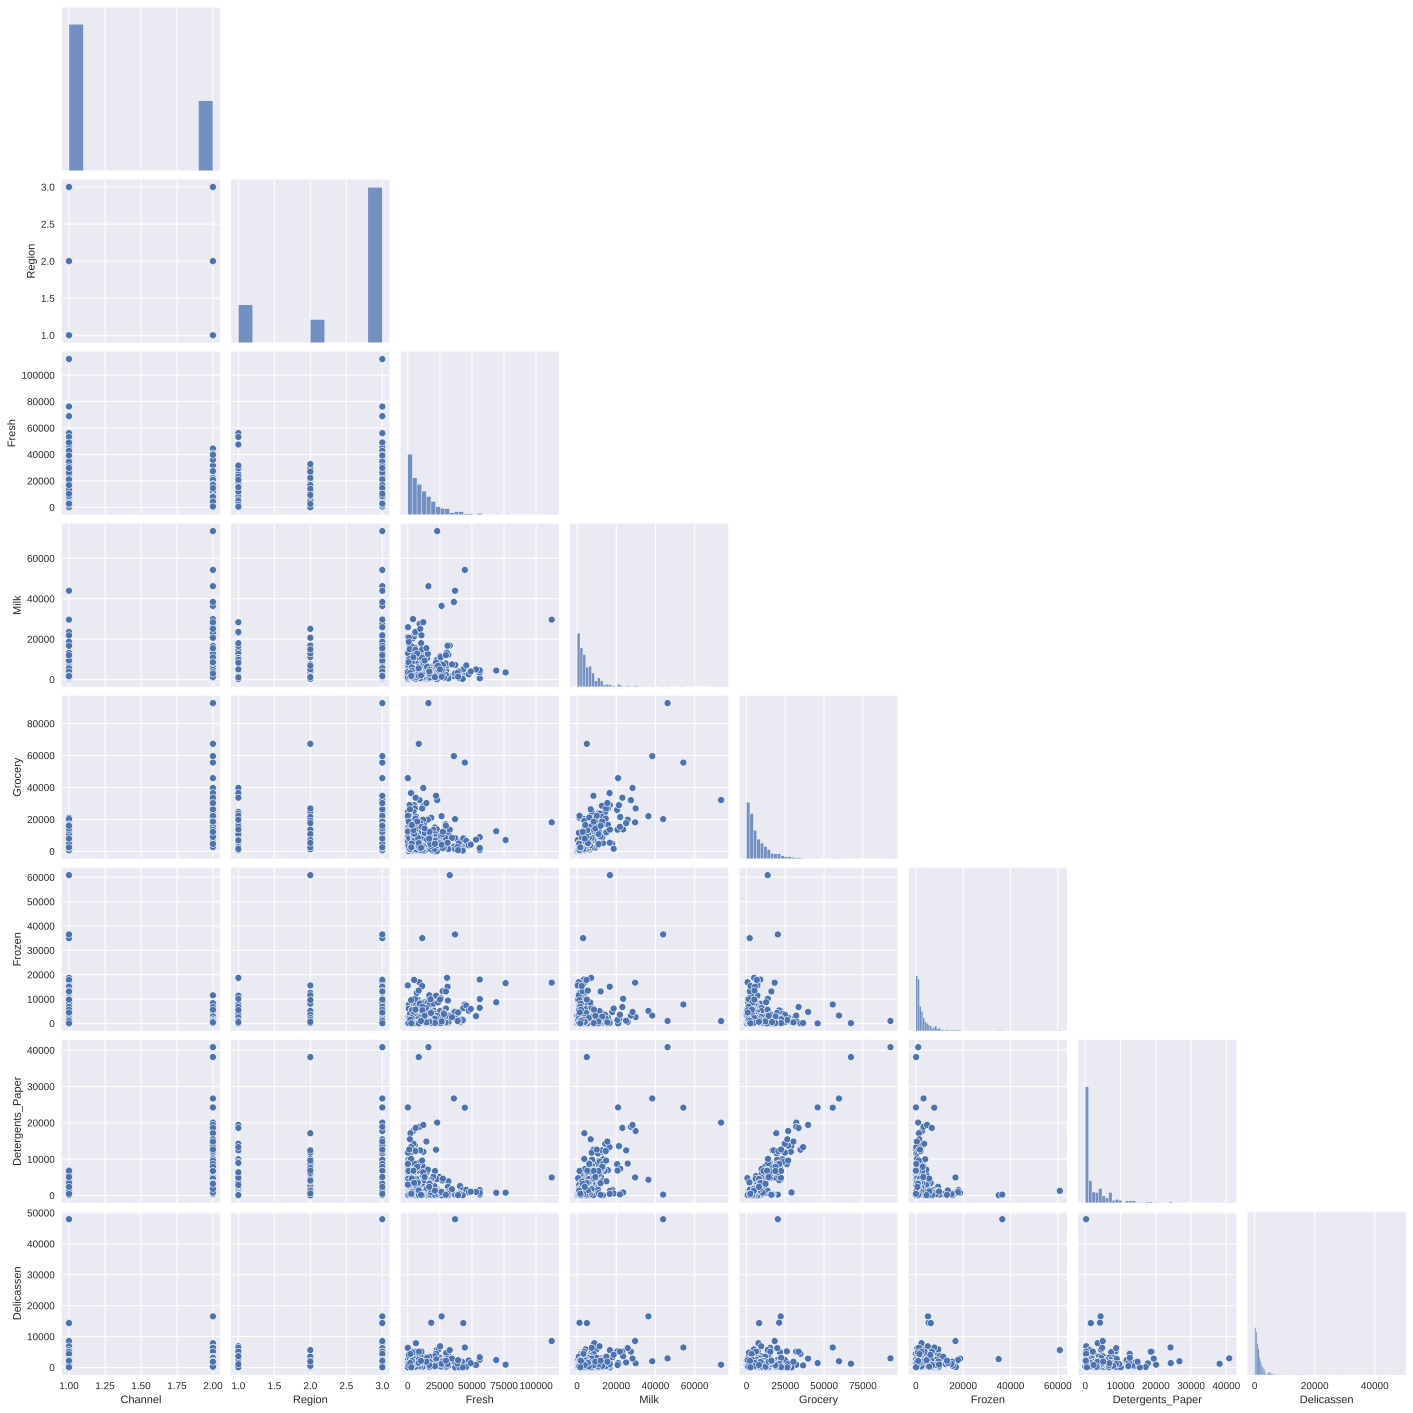

In [ ]:
sns.pairplot(df , corner = True, kind = 'scatter')
sns.despine()

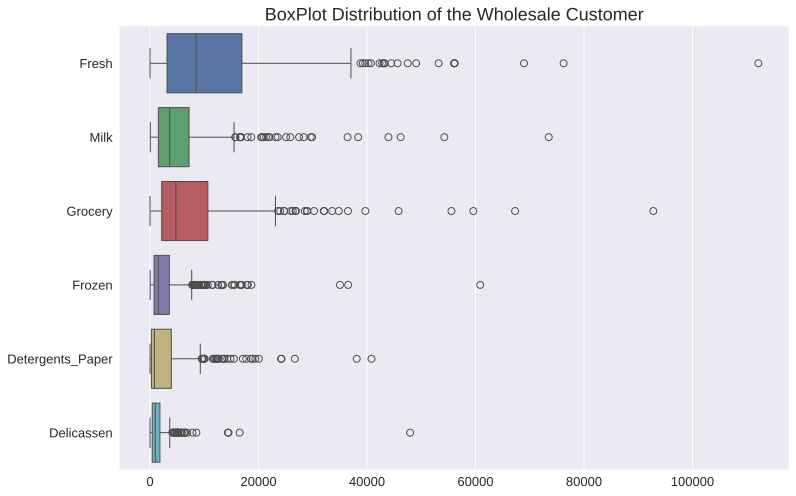

In [ ]:
plt.figure(figsize= (12,8))
sns.boxplot(df.iloc[:,-6:], orient= 'h')
plt.title("BoxPlot Distribution of the Wholesale Customer", fontsize = 18)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
sns.despine()

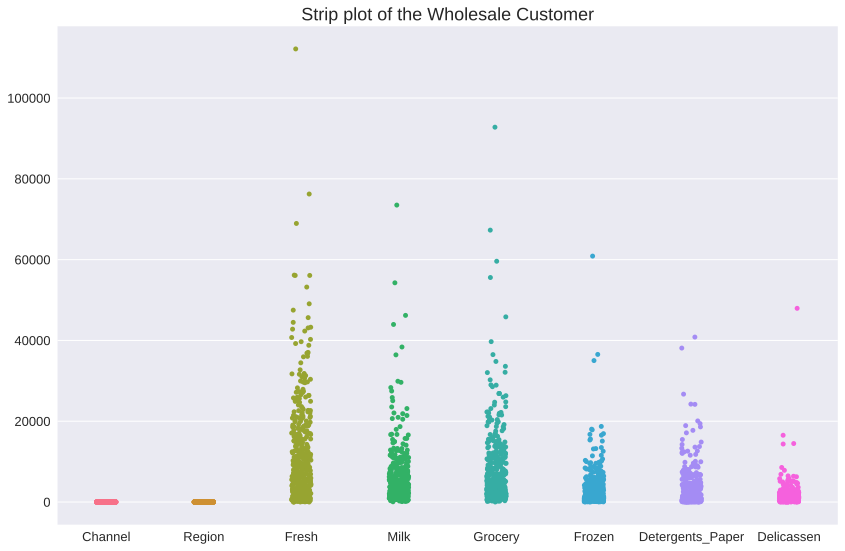

In [ ]:
plt.figure(figsize= (14,9))
sns.stripplot(df,
              jitter = True,
              dodge= False
              )
plt.title("Strip plot of the Wholesale Customer", fontsize = 18)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
sns.despine()

In [ ]:
df[df.select_dtypes(include= 'number').ge(40000).any(axis = 1)]

Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
29         1       3   43088   2100     2609    1200              1107   
39         1       3   56159    555      902   10002               212   
47         2       3   44466  54259    55571    7782             24171   
52         2       3   40721   3916     5876     532              2587   
61         2       3   35942  38369    59598    3254             26701   
65         2       3      85  20959    45828      36             24231   
85         2       3   16117  46197    92780    1026             40827   
86         2       3   22925  73498    32114     987             20070   
87         1       3   43265   5025     8117    6312              1579   
103        1       3   56082   3504     8906   18028              1480   
125        1       3   76237   3473     7102   16538               778   
129        1       3   42312    926     1510    1718               410   
176        1       3   45640   6958     6536    7368              1532   
181        1       3  112151  29627    18148   16745              4948   
183        1       3   36847  43950    20170   36534               239   
239        1       1   47493   2567     3779    5243               828   
258        1       1   56083   4563     2124    6422               730   
259        1       1   53205   4959     7336    3012               967   
282        1       3   49063   3965     4252    5970              1041   
284        1       3   68951   4411    12609    8692               751   
285        1       3   40254    640     3600    1042               436   
289        1       3   42786    286      471    1388                32   
325        1       2   32717  16784    13626   60869              1272   
333        2       2    8565   4980    67298     131             38102   

     Delicassen  
29          823  
39         2916  
47         6465  
52         1278  
61         2017  
65         1423  
85         2944  
86          903  
87        14351  
103        2498  
125         918  
129        1819  
176         230  
181        8550  
183       47943  
239        2253  
258        3321  
259         818  
282        1404  
284        2406  
285          18  
289          22  
325        5609  
333        1215

In [ ]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [ ]:
# b. Remove the Channel (restaurant, hotel, etc.) and Region columns since they are not fields we want to model on
df.drop(labels = ['Channel', 'Region'], axis = 'columns', inplace= True)
df.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

In [ ]:
# c. Note the number of rows and columns
df.shape

(440, 6)

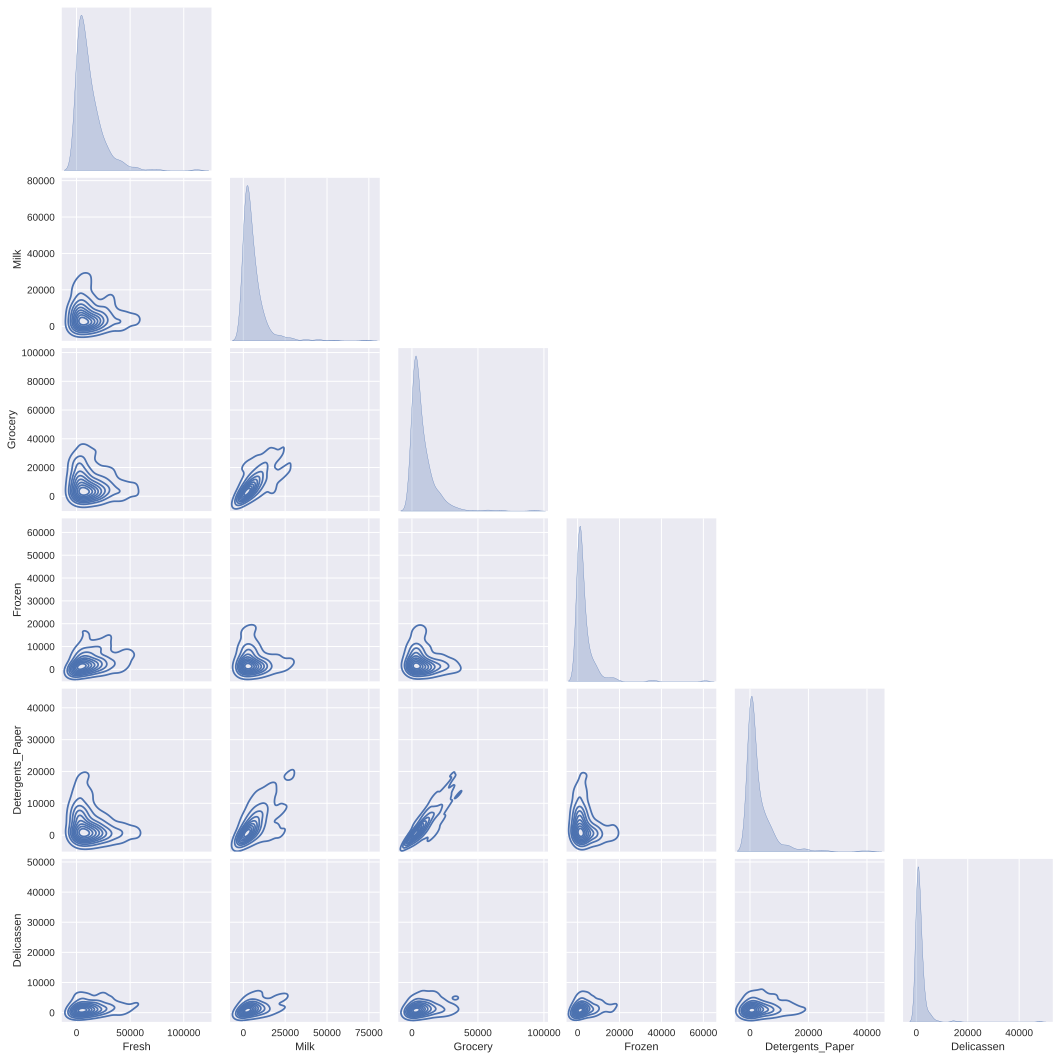

In [ ]:
sns.pairplot(df , corner = True, kind = 'kde')
plt.show()

In [ ]:
# d. Standardize the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

standardized = std_scaler.fit_transform(df)
df_standard = pd.DataFrame(standardized , columns = df.columns)
df_standard

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1   -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2   -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3    0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4    0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347
..        ...       ...       ...       ...               ...         ...
435  1.401312  0.848446  0.850760  2.075222         -0.566831    0.241091
436  2.155293 -0.592142 -0.757165  0.296561         -0.585519    0.291501
437  0.200326  1.314671  2.348386 -0.543380          2.511218    0.121456
438 -0.135384 -0.517536 -0.602514 -0.419441         -0.569770    0.213046
439 -0.729307 -0.555924 -0.573227 -0.620094         -0.504888   -0.522869

[440 rows x 6 columns]

In [ ]:
len(df.columns)

6

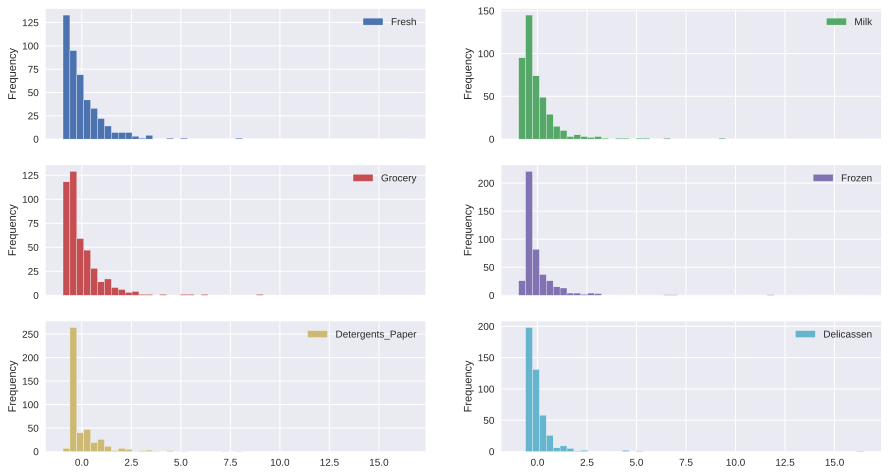

In [ ]:
df_standard.plot(kind = 'hist',
                 figsize = (15,8),
                 bins = 50,
                 subplots = True,

                 layout = (3,2))
plt.show()

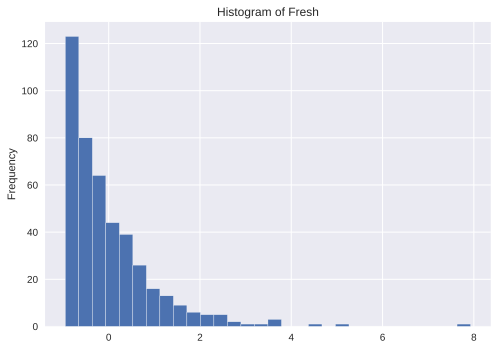

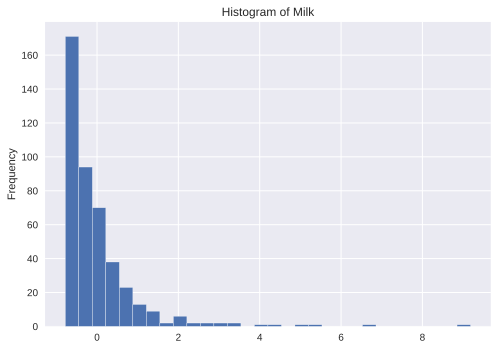

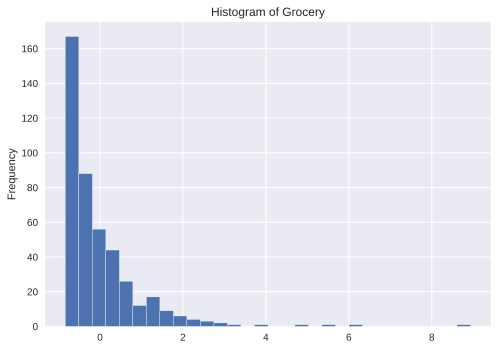

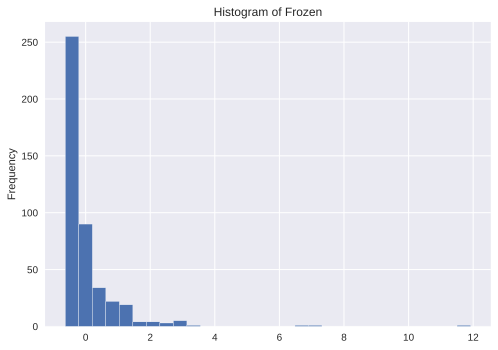

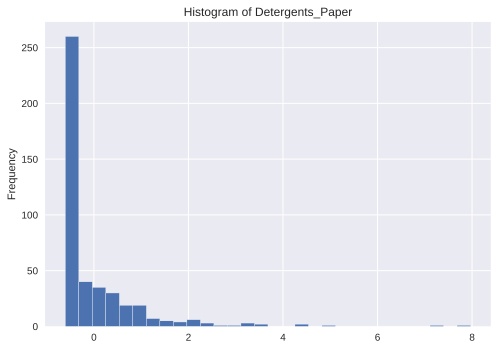

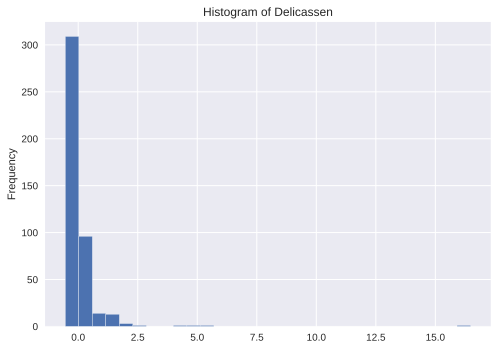

In [ ]:
for col in df.columns:
  df_standard[col].plot(kind = 'hist',
                        bins = 30,
                        title = f"Histogram of {col}",
                        )
  plt.show()

In [ ]:
summary = pd.DataFrame(standardized , columns = df.columns).agg(['mean', 'std']).T
summary.round(2)

mean  std
Fresh             -0.0  1.0
Milk               0.0  1.0
Grocery           -0.0  1.0
Frozen             0.0  1.0
Detergents_Paper   0.0  1.0
Delicassen        -0.0  1.0

In [ ]:
for i in summary.index:
  print(i , summary.loc[i,'mean'])

Fresh -3.431598439750484e-17
Milk 0.0
Grocery -4.0371746350005693e-17
Frozen 3.633457171500512e-17
Detergents_Paper 2.4223047810003414e-17
Delicassen -8.074349270001138e-18


In [ ]:
summary.index

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

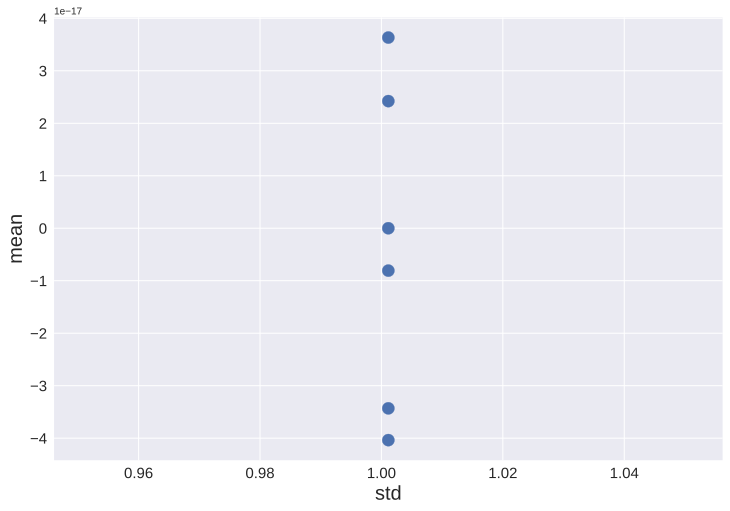

In [ ]:
summary.plot(kind = 'scatter' ,
            x = 'std' ,
            y = 'mean',
            figsize = (12,8),
            s = 150,
            fontsize = 15
            )
for i in summary.index:
  plt.annotate(i ,
               xy = (summary.loc[i , 'std'] + 0.002,
                     summary.loc[i,'mean'] + 0.002),
               size = 30
               )
plt.xlabel('std', fontsize = 20)
plt.ylabel('mean', fontsize = 20)
plt.show()

In [ ]:
# e. Double check that all the column means are 0 and standard deviations are 1


## 2. K-Means Clustering

In [ ]:
# a. Import KMeans and write a loop to fit models with 2 to 15 clusters
inertia_values = []
from sklearn.cluster import KMeans
for i in range(2 , 15+1):
  kmeans = KMeans(n_clusters= i ,
                  n_init = 'auto',
                  random_state= 20250812
                  )
  kmeans.fit(df_standard)
  inertia_values.append(kmeans.inertia_)

inertia_values

[2287.4221763339247,
 1642.247871966692,
 1325.9794740571892,
 1059.1088009612895,
 915.76075333879,
 836.1947771833513,
 746.0098850898507,
 681.985685272224,
 640.0427548263266,
 577.9732417682816,
 545.5380253209976,
 506.70818687452373,
 486.9048478981072,
 453.35027878086294]

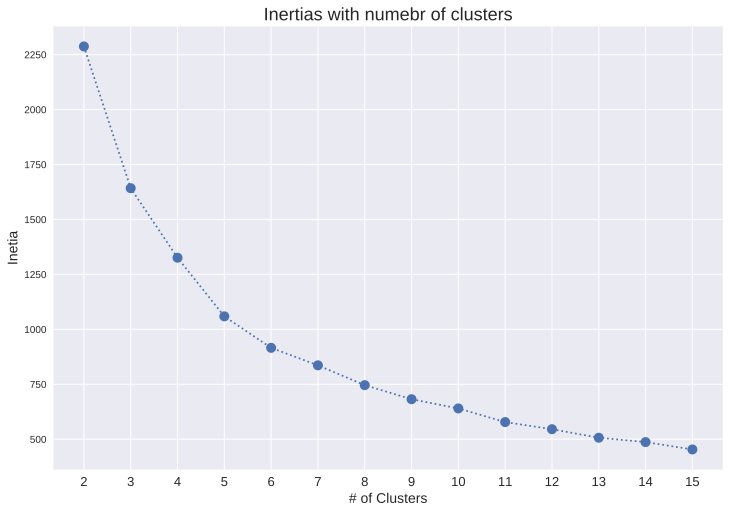

In [ ]:
# b. Create an inertia plot
plt.figure(figsize = (12,8))
plt.plot(range(2,15+1), inertia_values,
         marker = 'o',
         markersize = 10,
         ls = ':',
         )
plt.title('Inertias with numebr of clusters', fontsize = 18)
plt.xlabel('# of Clusters', fontsize = 14)
plt.xticks(range(2,15+1), fontsize = 13)
plt.ylabel('Inetia', fontsize = 14)

plt.show()

In [ ]:
# c. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
elbow = 5
kmeans5 = KMeans(n_clusters= 5 ,
                 n_init= 'auto',
                 random_state= 42)
kmeans5.fit(df_standard)

KMeans(n_clusters=5, random_state=42)

In [ ]:
kmeans5.feature_names_in_

array(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'], dtype=object)

In [ ]:
kmeans5.n_features_in_

6

In [ ]:
kmeans5.cluster_centers_

array([[-0.51381889,  0.64560212,  0.8982647 , -0.34063818,  0.9066611 ,
         0.04754206],
       [ 1.75638561, -0.12828154, -0.2192582 ,  0.85450532, -0.40434072,
         0.34325902],
       [ 0.38872897,  3.94304862,  4.02164626,  0.03578413,  4.22611641,
         0.94163573],
       [-0.22861348, -0.38400258, -0.43904531, -0.13576388, -0.39991848,
        -0.19523025],
       [ 1.80335587,  3.33298726,  0.9425185 ,  9.4098007 , -0.44640902,
         8.96415723]])

In [ ]:
kmeans5.labels_

array([3, 0, 0, 3, 1, 3, 3, 3, 3, 0, 0, 3, 1, 0, 0, 3, 0, 3, 3, 3, 3, 3,
       1, 2, 0, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 3, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 3, 1, 0, 1, 3, 2, 0, 3, 3, 3, 2, 3, 0, 3, 2,
       3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 1,
       3, 1, 3, 3, 2, 1, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 0, 3, 0,
       3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 4, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 1, 0,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 0, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
# d. Find the number of clients in each cluster
pd.Series(kmeans5.labels_).value_counts()

3    272
0     96
1     59
2     11
4      2
Name: count, dtype: int64

In [ ]:
# e. Create a heat map of the cluster centers


In [ ]:
cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_ ,
                                columns= df_standard.columns)
cluster_centers5

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0 -0.513819  0.645602  0.898265 -0.340638          0.906661    0.047542
1  1.756386 -0.128282 -0.219258  0.854505         -0.404341    0.343259
2  0.388729  3.943049  4.021646  0.035784          4.226116    0.941636
3 -0.228613 -0.384003 -0.439045 -0.135764         -0.399918   -0.195230
4  1.803356  3.332987  0.942519  9.409801         -0.446409    8.964157

In [ ]:
cluster_centers5.agg(['min', 'max']).T

min       max
Fresh            -0.513819  1.803356
Milk             -0.384003  3.943049
Grocery          -0.439045  4.021646
Frozen           -0.340638  9.409801
Detergents_Paper -0.446409  4.226116
Delicassen       -0.195230  8.964157

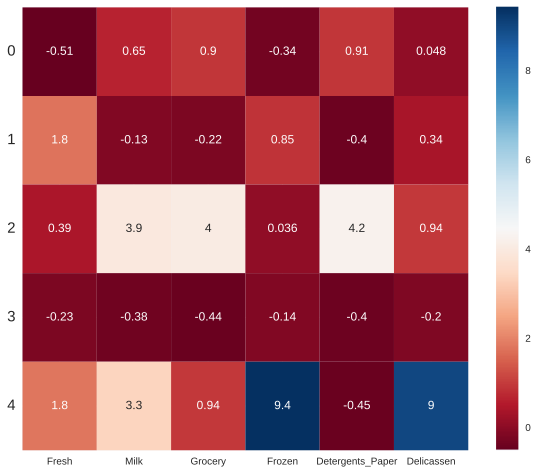

In [ ]:
plt.figure(figsize= (10,8))
sns.heatmap(cluster_centers5,
            annot= True,
            cmap = 'RdBu',
            # vmin = -1,
            # vmax = 18
            )
plt.yticks(rotation = 0, fontsize = 15)
plt.xticks(fontsize = 10)
sns.despine()

# f. Name the clusters
* cluster 4: **Lots of Frozen + Deli**
* cluster 3: Little of Everything
* cluster 2: More of Everything
* cluster 1: More Fresh + Frozen
* cluster 0: More Milk, Grocery, Paper Items


In [ ]:
kmeans5_clasters = pd.Series(kmeans5.labels_, name = 'kmeans5_clusters')
# .map(
#     {4 :"Lots of Frozen + Deli",
#     3: "Little of Everything",
#     2: "More of Everything",
#     1: "More Fresh + Frozen",
#     0: "More Milk, Grocery, Paper Items"}
#     )
kmeans5_clasters

0      3
1      0
2      0
3      3
4      1
      ..
435    1
436    1
437    0
438    3
439    3
Name: kmeans5_clusters, Length: 440, dtype: int32

In [ ]:
pd.concat([df_standard , kmeans5_clasters], axis = 1)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0    0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1   -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2   -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3    0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4    0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   
..        ...       ...       ...       ...               ...         ...   
435  1.401312  0.848446  0.850760  2.075222         -0.566831    0.241091   
436  2.155293 -0.592142 -0.757165  0.296561         -0.585519    0.291501   
437  0.200326  1.314671  2.348386 -0.543380          2.511218    0.121456   
438 -0.135384 -0.517536 -0.602514 -0.419441         -0.569770    0.213046   
439 -0.729307 -0.555924 -0.573227 -0.620094         -0.504888   -0.522869   

     kmeans5_clusters  
0                   3  
1                   0  
2                   0  
3                   3  
4                   1  
..                ...  
435                 1  
436                 1  
437                 0  
438                 3  
439                 3  

[440 rows x 7 columns]

In [ ]:
# g. Extra credit: create a silhouette scores plot instead of an inertia plot
from sklearn.metrics import silhouette_score

silhouette_score(df_standard ,
                 labels = kmeans5.labels_ ,
                 metric = 'euclidean')

np.float64(0.36890127429678043)

In [ ]:
# h. Extra credit: fit two models with the number of clusters for the two highest silhouette scores and name the clusters
def Kmeans_Optimization(data):
  silhouette_score_list = []
  for k in range(2 , 15+1):
    kmeans_k = KMeans(n_clusters= k , n_init= 100, random_state= 42)
    kmeans_k.fit(data)
    silhouette_score_list.append(silhouette_score(data ,
                                                labels= kmeans_k.labels_ ,
                                                metric = 'euclidean'))
  Summary_df = pd.DataFrame({'Number_of_Clusters': range(2,15+1),
                             'silhouette_score': silhouette_score_list})
  return Summary_df.sort_values('silhouette_score',
                                ascending= False,
                                ignore_index= True)


In [ ]:
Kmeans_Optimization(df_standard)

Number_of_Clusters  silhouette_score
0                    2          0.581087
1                    3          0.542401
2                    6          0.376535
3                    5          0.369040
4                    4          0.354611
5                    8          0.320116
6                    7          0.315860
7                   10          0.313295
8                    9          0.306440
9                   11          0.295509
10                  12          0.289389
11                  13          0.271842
12                  14          0.257447
13                  15          0.251651

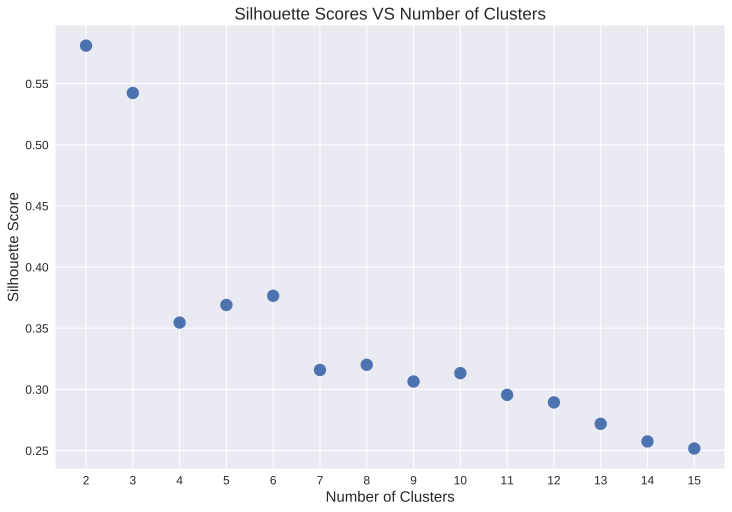

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(data = Kmeans_Optimization(df_standard),
            x =  'Number_of_Clusters',
            y = 'silhouette_score',
            ls = ':',
            s = 150)
plt.title('Silhouette Scores VS Number of Clusters', fontsize = 17)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.xticks(range(2,15+1),fontsize = 12)
plt.ylabel('Silhouette Score', fontsize = 15)
plt.yticks(fontsize = 12)
plt.show()

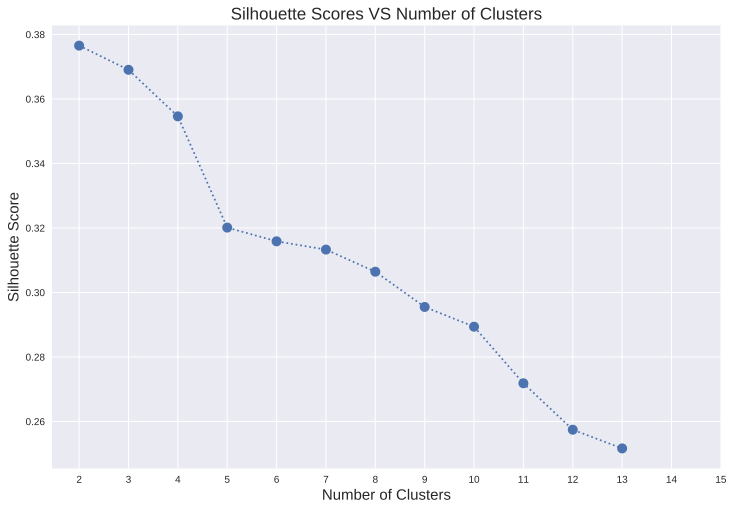

In [ ]:
silhouette_series = pd.Series(Kmeans_Optimization(df_standard).silhouette_score,
                              index = range(2,16))

silhouette_series.plot(marker ='o',
                       markersize = 10,
                       figsize = (12,8),
                       ls = ':')
plt.title('Silhouette Scores VS Number of Clusters', fontsize = 17)
plt.xticks(silhouette_series.index)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Silhouette Score', fontsize = 15)
plt.show()

In [ ]:
# We select the KMEANS nodel with the 2 centroids.
kmeans_2 = KMeans(n_clusters= 2 , n_init= 100, random_state= 42)
kmeans_2.fit(df_standard)

KMeans(n_clusters=2, n_init=100, random_state=42)

In [ ]:
list(set(pd.Series(kmeans_2.labels_)))

[0, 1]

In [ ]:
cluster_centers2 = pd.DataFrame(data = kmeans_2.cluster_centers_,
                                columns= df_standard.columns,
                                index= ['Cluster_{}'.format(i) for i in list(set(pd.Series(kmeans_2.labels_)))])
cluster_centers2

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Cluster_0 -0.001322 -0.208272 -0.228441 -0.003265         -0.232608   
Cluster_1  0.013222  2.082724  2.284406  0.032654          2.326081   

           Delicassen  
Cluster_0   -0.078875  
Cluster_1    0.788750

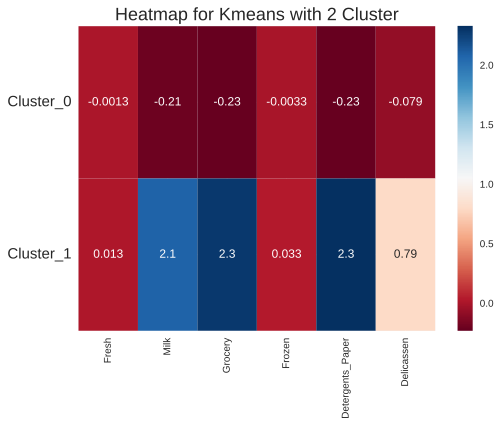

In [ ]:
sns.heatmap(cluster_centers2 ,
            annot = True,
            cmap = 'RdBu')

plt.title("Heatmap for Kmeans with 2 Cluster",
          fontsize = 18)
plt.yticks(rotation = 0,
           fontsize = 15
           )
#plt.xticks(rotation = 10, fontsize = 12)
plt.show()

## 3. Hierarchical Clustering

Text(0, 0.5, 'Euclidean Distance')

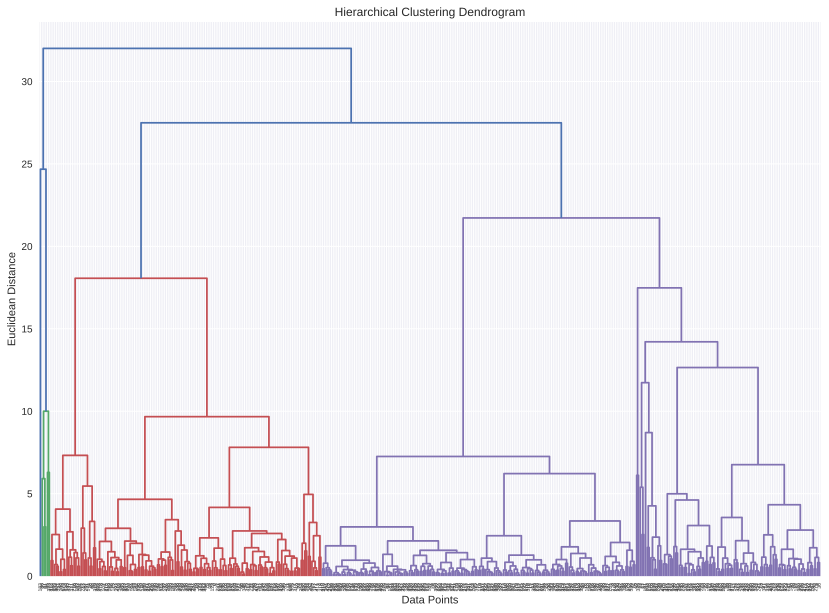

In [ ]:
# a. Create a dendrogram using the scaled data
from scipy.cluster.hierarchy import linkage , dendrogram
linkage_matrix = linkage(df_standard , method = 'ward')
plt.figure(figsize = (14,10))
dendrogram_inof = dendrogram(linkage_matrix)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")

Text(0, 0.5, 'Euclidean Distance')

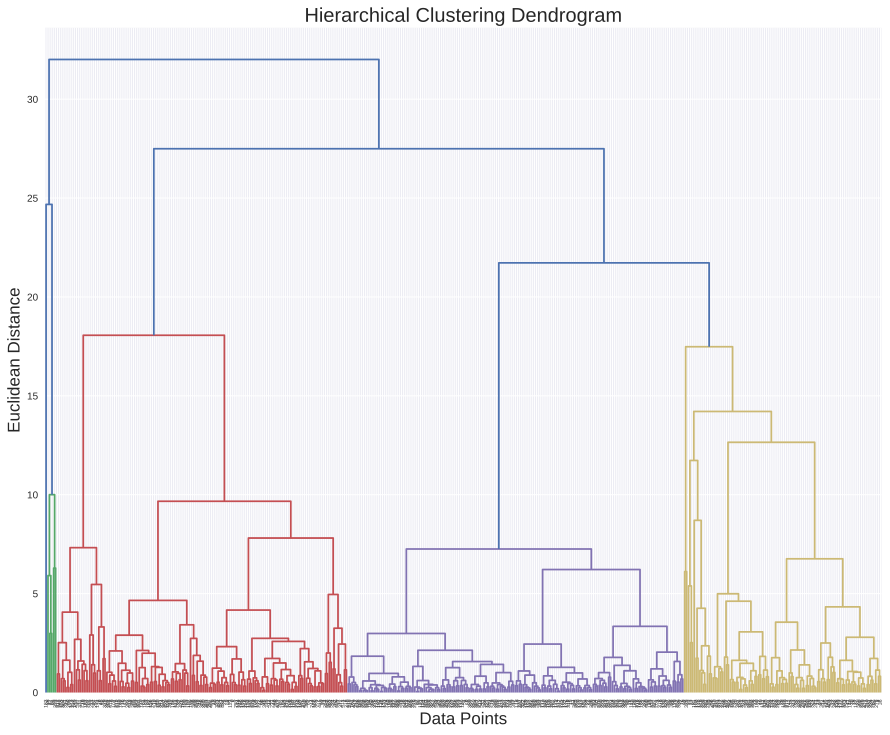

In [ ]:
# b. Visually identify the number of clusters and update the color threadshold, if necessary
# a. Create a dendrogram using the scaled data
from scipy.cluster.hierarchy import linkage , dendrogram
linkage_matrix = linkage(df_standard , method = 'ward')
plt.figure(figsize = (15,12))
dendrogram_inof = dendrogram(linkage_matrix,
                             color_threshold= 20)

plt.title("Hierarchical Clustering Dendrogram", fontsize = 20)
plt.xlabel("Data Points", fontsize = 17)
plt.ylabel("Euclidean Distance", fontsize = 17)

In [ ]:
# c. Fit an agglomerative clustering model on the scaled data set with the "best" clusters and view the number of data points in each cluster
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 5,
                              metric = 'euclidean',
                              linkage = 'ward'
                              )
agg.fit(df_standard)

AgglomerativeClustering(n_clusters=5)

In [ ]:
agg.labels_

array([0, 0, 0, 4, 2, 0, 0, 0, 4, 0, 0, 4, 2, 2, 2, 4, 0, 0, 2, 0, 2, 4,
       2, 2, 0, 0, 4, 4, 0, 2, 2, 4, 2, 2, 4, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 4, 4, 2, 0, 2, 4, 0, 0, 4, 0, 0, 1, 0, 0, 4, 0,
       0, 2, 4, 4, 2, 2, 4, 2, 0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0, 1, 1, 2,
       4, 2, 4, 2, 0, 2, 0, 4, 0, 4, 4, 4, 0, 0, 0, 2, 4, 4, 0, 0, 0, 0,
       4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 2, 2, 2, 0, 2, 4, 4,
       4, 4, 4, 4, 0, 0, 2, 4, 2, 2, 2, 4, 0, 0, 4, 4, 4, 2, 4, 4, 4, 0,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 0,
       2, 2, 0, 4, 2, 2, 0, 3, 4, 0, 4, 0, 0, 0, 2, 4, 4, 0, 4, 2, 2, 0,
       4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 4, 0, 4,
       4, 0, 4, 4, 4, 4, 2, 4, 4, 4, 2, 0, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 0, 0, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 0, 4, 2, 2, 4, 4, 2, 4,
       0, 0, 0, 2, 0, 4, 4, 4, 0, 2, 4, 4, 2, 2, 4, 2, 4, 0, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 4, 4, 0, 2, 4, 4, 0, 0, 4, 2,

In [ ]:
pd.Series(agg.labels_).value_counts()

4    177
0    153
2    104
1      5
3      1
Name: count, dtype: int64

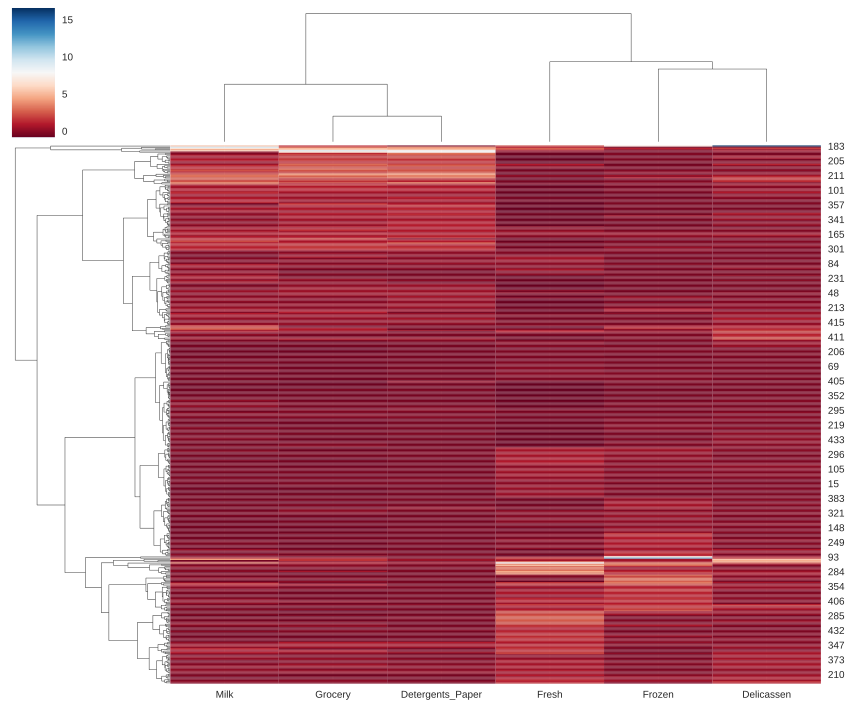

In [ ]:
# d. Create a cluster map of the model you just fit
sns.clustermap(df_standard,
               method = 'ward',
               cmap = 'RdBu',
               figsize = (12,10),
               xticklabels = df_standard.columns
               )
plt.show()

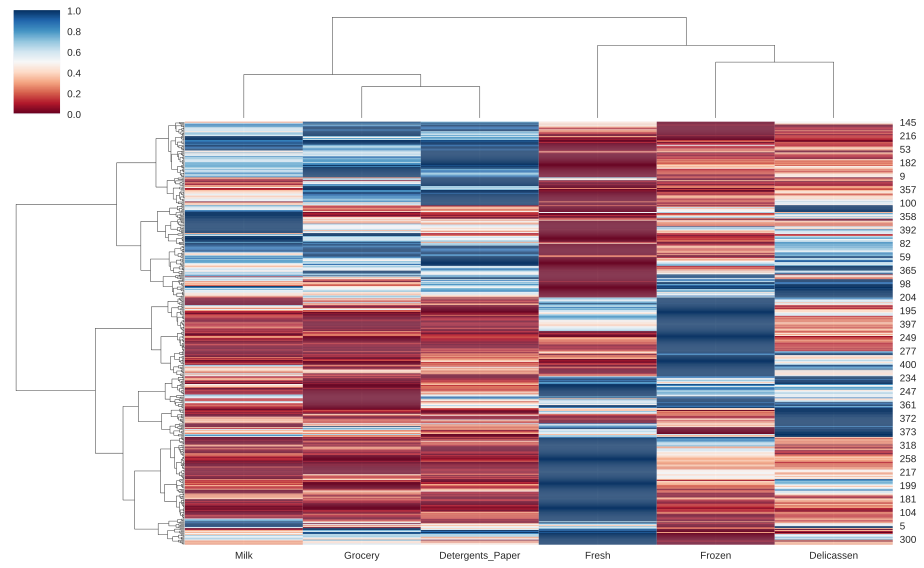

In [ ]:
# e. Extra credit: within the clustermap function, add z_score=0 (scales data by row), see what happens and interpret the clusters
# standard_scale = 0
sns.clustermap(data = df_standard,
               method = 'ward',
               metric = 'euclidean',
               cmap ='RdBu',
               figsize = (13,8),
               #z_score = 0,
               standard_scale = 0
               )
plt.show()

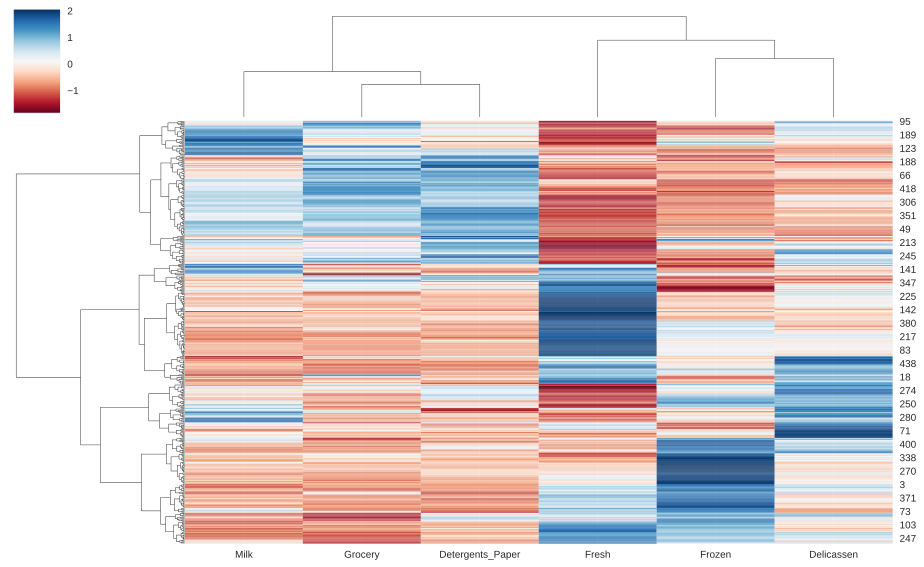

In [ ]:
# e. Extra credit: within the clustermap function, add z_score=0 (scales data by row), see what happens and interpret the clusters
# z_score = 0
sns.clustermap(data = df_standard,
               method = 'ward',
               metric = 'euclidean',
               cmap ='RdBu',
               figsize = (13,8),
               z_score = 0,
               #standard_scale = 0
               )
plt.show()

In [ ]:
# f. Extra credit: write a loop to view the silhouette score for 2 to 20 clusters
def Silhouette_Score_finder(data):
  sil_scores = []
  clusters = range(2,20+1)
  for c in clusters:
    agg_optimization = AgglomerativeClustering(n_clusters= c ,
                                               metric = 'euclidean',
                                               linkage= 'ward'
                                               )
    agg_optimization.fit(data)
    sil_scores.append(silhouette_score(df_standard,
                                       labels = agg_optimization.labels_,
                                       metric = 'euclidean',
                                       sample_size = None
                                       ))
  df_scores = pd.DataFrame({'Number_of_Clusters': clusters,
                            "Silhouette_Scores" : sil_scores})
  df_scores.sort_values(['Silhouette_Scores'],
                        ascending= False,
                        inplace= True)
  return df_scores

In [ ]:
Silhouette_Score_finder(df_standard)

Number_of_Clusters  Silhouette_Scores
0                    2           0.792457
9                   11           0.280154
8                   10           0.279543
7                    9           0.272026
2                    4           0.267015
1                    3           0.264609
6                    8           0.252038
11                  13           0.246477
10                  12           0.245624
5                    7           0.244057
3                    5           0.239884
4                    6           0.234250
13                  15           0.230841
12                  14           0.229030
17                  19           0.202193
18                  20           0.201606
15                  17           0.195995
16                  18           0.195495
14                  16           0.188967

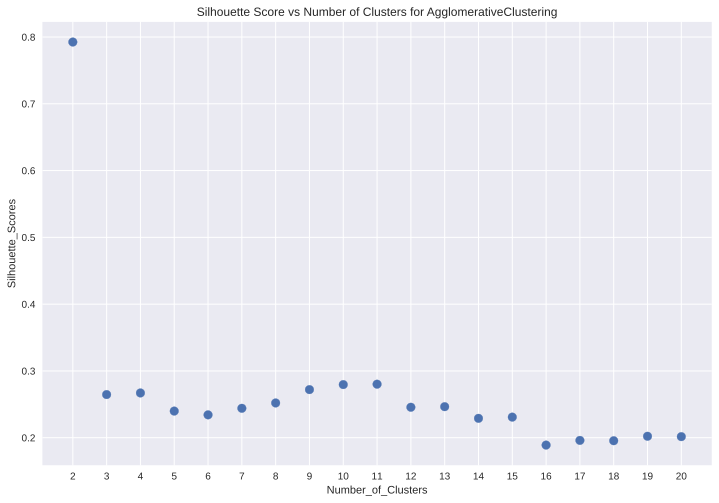

In [ ]:
Silhouette_Score_finder(df_standard).plot(kind = 'scatter',
                                          x = 'Number_of_Clusters',
                                          y ='Silhouette_Scores',
                                          s = 75,
                                          xticks = range(2,20+1),
                                          title = 'Silhouette Score vs Number of Clusters for AgglomerativeClustering',
                                          figsize = (12,8)
                                          )

plt.show()

In [ ]:
# g. Extra credit: fit a model with the number of clusters for the highest silhouette score
def Model_Finder(data):
  clusters = range(2, 15+1)
  silhouette_score_KMEANS = []
  silhouette_score_Agglomerative = []
  for k in range(2 , 15+1):
    kmeans_k = KMeans(n_clusters= k , n_init= 100, random_state= 42)
    kmeans_k.fit(data)
    silhouette_score_KMEANS.append(silhouette_score(data ,
                                                labels= kmeans_k.labels_ ,
                                                metric = 'euclidean'))

    agg_optimization = AgglomerativeClustering(n_clusters= k ,
                                               metric = 'euclidean',
                                               linkage= 'ward'
                                               )
    agg_optimization.fit(data)
    silhouette_score_Agglomerative.append(silhouette_score(df_standard,
                                       labels = agg_optimization.labels_,
                                       metric = 'euclidean',
                                       sample_size = None
                                       ))

  df_model_scores = pd.DataFrame( {"KMEANS_Silhouette_Scores": pd.Series(silhouette_score_KMEANS) ,
                                   "Agglomerative_Silhouette_Scores": pd.Series(silhouette_score_Agglomerative)} ,
                                    index = clusters)
  df_model_scores.index.name = 'Clusters'
  #df_model_scores.sort_values(["KMEANS_Scores" , "Agglomerative_Scores"],
   #                           ascending= [False, False], inplace= True)


  return df_model_scores


In [ ]:
Model_Finder(df_standard)

KMEANS_Silhouette_Scores  Agglomerative_Silhouette_Scores
Clusters                                                           
2                         0.354611                         0.267015
3                         0.369040                         0.239884
4                         0.376535                         0.234250
5                         0.315860                         0.244057
6                         0.320116                         0.252038
7                         0.306440                         0.272026
8                         0.313295                         0.279543
9                         0.295509                         0.280154
10                        0.289389                         0.245624
11                        0.271842                         0.246477
12                        0.257447                         0.229030
13                        0.251651                         0.230841
14                             NaN                              NaN
15                             NaN                              NaN

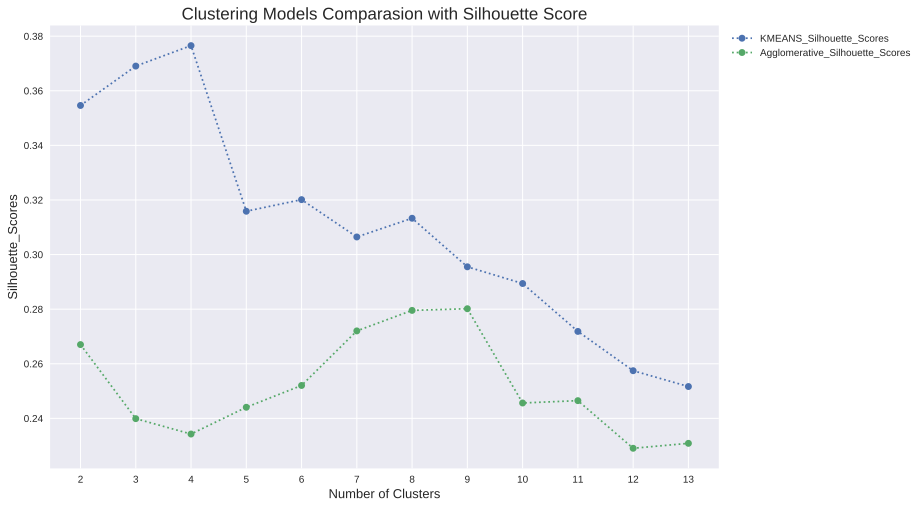

In [ ]:
Model_Finder(df_standard).plot(marker = 'o',
                               ylabel = 'Silhouette_Scores',
                               ls = ":",
                               figsize = (12,8),
                               xticks = range(2,13+1)
                               )
plt.title("Clustering Models Comparasion with Silhouette Score", fontsize = 17)
plt.xlabel("Number of Clusters", fontsize = 13)
plt.ylabel("Silhouette_Scores", fontsize = 13)
plt.legend(bbox_to_anchor = (1.3,1))
plt.show()

## 4. DBSCAN

In [ ]:
# a. Copy over the tune_dbscan function from the demo code
# loop through many values of epsilon and min_samples

def dbscan_tunnig(data):

  import numpy as np
  from sklearn.cluster import DBSCAN
  results = []

  # define a range of eps and min_samples values to loop through
  eps_values = np.arange(.1, 2, .1)
  min_samples_values = np.arange(2, 10, 1)

  # loop through the combinations of eps and min_samples
  for eps in eps_values:
      for min_samples in min_samples_values:
          dbscan = DBSCAN(eps=eps, min_samples=min_samples)
          dbscan.fit(data)
          labels = dbscan.labels_

          # count the number of clusters (excluding noise points labeled as -1)
          n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

          # count the number of noise points (labeled as -1)
          n_noise = list(labels).count(-1)

          # calculate the silhouette score
          if n_clusters > 1:  # silhouette score requires at least 2 clusters
              silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
          else:
              silhouette = None

          results.append([eps, min_samples, n_clusters, n_noise, silhouette])

  # put the results in a dataframe
  dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                  "Number of Noise Points", "Silhouette Score"])
  return dbscan_results.head()

In [ ]:
# b. Apply the dbscan function on the scaled data
dbscan_tunnig(df_standard)

Eps  Min Samples  Number of Clusters  Number of Noise Points  \
0  0.1            2                   8                     423   
1  0.1            3                   1                     437   
2  0.1            4                   0                     440   
3  0.1            5                   0                     440   
4  0.1            6                   0                     440   

   Silhouette Score  
0            -0.393  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [ ]:
# c. Sort the data by highest silhouette score
dbscan_tunnig(df_standard).sort_values(by = 'Silhouette Score', ascending= False)

Eps  Min Samples  Number of Clusters  Number of Noise Points  \
0  0.1            2                   8                     423   
1  0.1            3                   1                     437   
2  0.1            4                   0                     440   
3  0.1            5                   0                     440   
4  0.1            6                   0                     440   

   Silhouette Score  
0            -0.393  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [ ]:
# d. Notice that the top eps value is close to 2, so update the function to test eps values up to 5 (instead of 2)
# a. Copy over the tune_dbscan function from the demo code
# loop through many values of epsilon and min_samples

def dbscan_tunnig(data):

  import numpy as np
  from sklearn.cluster import DBSCAN
  results = []

  # define a range of eps and min_samples values to loop through
  eps_values = np.arange(.1, 5, .1)
  min_samples_values = np.arange(2, 10, 1)

  # loop through the combinations of eps and min_samples
  for eps in eps_values:
      for min_samples in min_samples_values:
          dbscan = DBSCAN(eps=eps, min_samples=min_samples)
          dbscan.fit(data)
          labels = dbscan.labels_

          # count the number of clusters (excluding noise points labeled as -1)
          n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

          # count the number of noise points (labeled as -1)
          n_noise = list(labels).count(-1)

          # calculate the silhouette score
          if n_clusters > 1:  # silhouette score requires at least 2 clusters
              silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
          else:
              silhouette = None

          results.append([eps, min_samples, n_clusters, n_noise, silhouette])

  # put the results in a dataframe
  dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                  "Number of Noise Points", "Silhouette Score"])
  return dbscan_results.head()

In [ ]:
dbscan_tunnig(df_standard).sort_values(by = 'Silhouette Score', ascending= False)

Eps  Min Samples  Number of Clusters  Number of Noise Points  \
0  0.1            2                   8                     423   
1  0.1            3                   1                     437   
2  0.1            4                   0                     440   
3  0.1            5                   0                     440   
4  0.1            6                   0                     440   

   Silhouette Score  
0            -0.393  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [ ]:
# e. Try applying the function again and view the top silhouette scores


In [ ]:
# f. Fit a DBSCAN model on the scaled data set with the best eps + min_samples values and view the number of data points in each cluster
from sklearn.cluster import DBSCAN
dbscan2 = DBSCAN(eps = 3.5 , min_samples = 2)
dbscan2.fit(df_standard)

DBSCAN(eps=3.5, min_samples=2)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(df_standard , labels= dbscan2.labels_ )

np.float64(0.740283564230615)

## 5. Compare Techniques

For each of the following 5 models, fit the model on the scaled data, note down the number of data points in each cluster and record the silhouette score:
1. K-Means with 3 clusters
2. K-Means with 5 clusters
3. Hiearchical Clustering with 2 clusters
4. Hierarchical Clustering with 5 clusters
5. DBSCAN with 2 clusters

In [ ]:
def Model_Comparasion(df):
  from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
  from sklearn.metrics import silhouette_score
  Silhouette_Scores_List = []
  KMEANS3 = KMeans(n_clusters= 3 , n_init = 'auto', random_state= 42)
  KMEANS3.fit(df_standard)
  Silhouette_Scores_List.append(silhouette_score(df , labels= KMEANS3.labels_ , metric = 'euclidean'))

  # KMEANS with 5_centroids
  KMEANS5 = KMeans(n_clusters= 5 , n_init = 'auto', random_state= 42)
  KMEANS5.fit(df_standard)
  Silhouette_Scores_List.append(silhouette_score(df , labels= KMEANS5.labels_ , metric = 'euclidean'))

  # Hiearchical Clustering with 2 clusters
  agg2 = AgglomerativeClustering(n_clusters = 2 , metric = 'euclidean', linkage = 'ward')
  agg2.fit(df_standard)
  Silhouette_Scores_List.append(silhouette_score(df , labels= agg2.labels_ , metric = 'euclidean'))

  # Hiearchical Clustering with 5 clusters
  agg5 = AgglomerativeClustering(n_clusters = 5 , metric = 'euclidean', linkage = 'ward')
  agg5.fit(df_standard)
  Silhouette_Scores_List.append(silhouette_score(df , labels= agg5.labels_ , metric = 'euclidean'))

  # DBSCAN with 2 clusters
  dbscan2 = DBSCAN(eps = 3.5 , min_samples = 2)
  dbscan2.fit(df_standard)
  Silhouette_Scores_List.append(silhouette_score(df , labels= dbscan2.labels_ , metric = 'euclidean'))

  df_model_performance = pd.Series(Silhouette_Scores_List ,
                                   index= ['K-Means with 3 clusters',
                                           'K-Means with 5 clusters',
                                           'Hiearchical Clustering with 2 clusters',
                                           'Hierarchical Clustering with 5 clusters',
                                           'DBSCAN with 2 clusters'],
                                   name='Silhouette Score'
                                   )
  return df_model_performance.sort_values(ascending= False)


In [ ]:
Model_Comparasion(df_standard)

Hiearchical Clustering with 2 clusters     0.792457
DBSCAN with 2 clusters                     0.740284
K-Means with 3 clusters                    0.458263
K-Means with 5 clusters                    0.368901
Hierarchical Clustering with 5 clusters    0.239884
Name: Silhouette Score, dtype: float64

## 6. Recommend Client Segments

In [ ]:
# a. With the top model as the K-Means model with 3 clusters, review the results again
kmeans3 = KMeans(n_clusters= 3 , n_init= 'auto', random_state= 43)
kmeans3.fit(df_standard)

KMeans(n_clusters=3, random_state=43)

In [ ]:
pd.Series(kmeans3.labels_).value_counts()

0    318
1    109
2     13
Name: count, dtype: int64

In [ ]:
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_ ,
                                columns= df_standard.columns,
                                index = ["Cluster_0", "Cluster_1", "Cluster_2"])
cluster_centers3

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Cluster_0  0.128126 -0.359900 -0.428714  0.082307         -0.425531   
Cluster_1 -0.503804  0.574921  0.823225 -0.332913          0.816078   
Cluster_2  1.090044  3.983203  3.584579  0.777993          3.566641   

           Delicassen  
Cluster_0   -0.118121  
Cluster_1    0.075524  
Cluster_2    2.256182

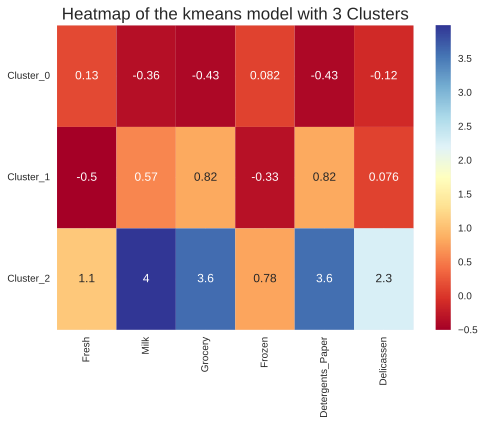

In [ ]:
sns.heatmap(data = cluster_centers3 ,
            annot = True,
            vmin = cluster_centers3.min().min(),
            vmax = cluster_centers3.max().max(),
            cmap = 'RdYlBu'
            )
plt.title("Heatmap of the kmeans model with 3 Clusters", fontsize = 17)
plt.yticks(rotation = 0)
sns.despine()

In [ ]:
# b. Clearly state what you would recommend as client segments and how you would better support those clients


## 7. Predict the Cluster of a New Client

In [ ]:
# a. Given this new client, determine which cluster they fall into
import pandas as pd
import numpy as np

new_client = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])],
                          columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
new_client

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  15000  15000    30000     500             15000        2000

In [ ]:
# b. Scale the new client data using the same scaler object from the Data Prep step
new_client_standard = pd.DataFrame(std_scaler.transform(new_client), columns = new_client.columns)
new_client_standard

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.237451  1.248474  2.322787 -0.530388          2.544604    0.168671

In [ ]:
# c. Make a prediction using the K-Means model with 3 clusters
kmeans3.predict(new_client_standard)

array([1], dtype=int32)

In [ ]:
# d. Which cluster does the new client belong to?
#cluster 1